In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
file_path = '2017_jun_final.csv'
df = pd.read_csv(file_path)

In [3]:
df.head()

,N,Должность,Язык.программирования,Специализация,Общий.опыт.работы,Опыт.работы.на.текущем.месте,Зарплата.в.месяц,Изменение.зарплаты.за.12.месяцев,Город,Размер.компании,...,Еще.студент,Уровень.английского,Предметная.область,Дата.заполнения,User.Agent,exp,current_job_exp,salary,Валюта,cls
0,1,Junior QA engineer,NaN,Manual QA,0.5,0.5,400,0,Харьков,до 10 человек,...,True,ниже среднего,"iOS,eCommerce",12/06/2017 12:38:08,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,0.5,0.5,400,NaN,QA
1,2,Junior QA engineer,NaN,Manual QA,меньше 3 месяцев,меньше 3 месяцев,430,130,Харьков,свыше 1000 человек,...,True,выше среднего,Веб-разработка,12/06/2017 12:42:51,Mozilla/5.0 (iPad; CPU OS 10_2_1 like Mac OS X...,0.0,0.0,430,NaN,QA
2,3,Software Engineer,C#/.NET,NaN,4,1,2500,800,Киев,до 1000 человек,...,False,средний,"Веб-разработка,Корпоративные системы",12/06/2017 13:02:47,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,4.0,1.0,2500,NaN,DEV
3,4,Software Engineer,JavaScript,NaN,5,4,2000,400,Одесса,до 200 человек,...,False,ниже среднего,"Desktop Applications,Веб-разработка",12/06/2017 13:03:01,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,5.0,4.0,2000,NaN,DEV
4,5,Senior Software Engineer,JavaScript,NaN,10 и более лет,0.5,4500,500,Другой,до 10 человек,...,False,средний,"Desktop Applications,Веб-разработка",12/06/2017 13:03:47,Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_2 like...,10.0,0.5,4500,NaN,DEV


In [4]:
df.shape

(8704, 25)

In [5]:
df.dtypes

N                                     int64
Должность                            object
Язык.программирования                object
Специализация                        object
Общий.опыт.работы                    object
Опыт.работы.на.текущем.месте         object
Зарплата.в.месяц                      int64
Изменение.зарплаты.за.12.месяцев      int64
Город                                object
Размер.компании                      object
Тип.компании                         object
Пол                                  object
Возраст                               int64
Образование                          object
Университет                          object
Еще.студент                            bool
Уровень.английского                  object
Предметная.область                   object
Дата.заполнения                      object
User.Agent                           object
exp                                 float64
current_job_exp                     float64
salary                          

In [6]:
df.isnull().sum() / len(df) * 100

N                                    0.000000
Должность                            0.000000
Язык.программирования               44.232537
Специализация                       82.938879
Общий.опыт.работы                    0.000000
Опыт.работы.на.текущем.месте         0.000000
Зарплата.в.месяц                     0.000000
Изменение.зарплаты.за.12.месяцев     0.000000
Город                                0.000000
Размер.компании                      0.000000
Тип.компании                         0.000000
Пол                                  0.000000
Возраст                              0.000000
Образование                          0.000000
Университет                          4.113051
Еще.студент                          0.000000
Уровень.английского                  0.000000
Предметная.область                   2.562040
Дата.заполнения                      0.000000
User.Agent                           0.000000
exp                                  0.000000
current_job_exp                   

In [7]:
columns_with_na = df.columns[df.isna().any()]

columns_to_drop = [col for col in columns_with_na if col != 'Язык.программирования']
df = df.drop(columns=columns_to_drop)
df

,N,Должность,Язык.программирования,Общий.опыт.работы,Опыт.работы.на.текущем.месте,Зарплата.в.месяц,Изменение.зарплаты.за.12.месяцев,Город,Размер.компании,Тип.компании,Пол,Возраст,Образование,Еще.студент,Уровень.английского,Дата.заполнения,User.Agent,exp,current_job_exp,salary
0,1,Junior QA engineer,NaN,0.5,0.5,400,0,Харьков,до 10 человек,Аутсорсинговая,женский,20,Незаконченное высшее,True,ниже среднего,12/06/2017 12:38:08,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,0.5,0.5,400
1,2,Junior QA engineer,NaN,меньше 3 месяцев,меньше 3 месяцев,430,130,Харьков,свыше 1000 человек,Аутсорсинговая,женский,21,Незаконченное высшее,True,выше среднего,12/06/2017 12:42:51,Mozilla/5.0 (iPad; CPU OS 10_2_1 like Mac OS X...,0.0,0.0,430
2,3,Software Engineer,C#/.NET,4,1,2500,800,Киев,до 1000 человек,Аутсорсинговая,мужской,26,Высшее,False,средний,12/06/2017 13:02:47,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,4.0,1.0,2500
3,4,Software Engineer,JavaScript,5,4,2000,400,Одесса,до 200 человек,Продуктовая,мужской,30,Среднее,False,ниже среднего,12/06/2017 13:03:01,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,5.0,4.0,2000
4,5,Senior Software Engineer,JavaScript,10 и более лет,0.5,4500,500,Другой,до 10 человек,Продуктовая,мужской,30,Техникум / Колледж,False,средний,12/06/2017 13:03:47,Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_2 like...,10.0,0.5,4500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8699,8700,QA engineer,NaN,1,меньше 3 месяцев,700,700,Одесса,до 50 человек,Аутсорсинговая,мужской,23,Высшее,False,средний,12/07/2017 15:45:24,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:54....,1.0,0.0,700
8700,8701,Marketing,NaN,0.5,0.5,400,120,Киев,до 50 человек,Продуктовая,женский,22,Высшее,False,ниже среднего,12/07/2017 17:00:06,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,0.5,0.5,400
8701,8702,Junior Software Engineer,Ruby/Rails,1,0.5,800,500,Львов,до 10 человек,Аутстаффинговая,мужской,30,Незаконченное высшее,False,выше среднего,12/07/2017 17:32:26,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1.0,0.5,800
8702,8703,Team lead,NaN,6,4,2600,0,Днепр,свыше 1000 человек,Аутсорсинговая,мужской,34,Высшее,False,продвинутый,12/07/2017 18:14:59,Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.3...,6.0,4.0,2600


In [8]:
missing_percentage_cleaned = df.isnull().sum() / len(df) * 100

missing_percentage_cleaned

N                                    0.000000
Должность                            0.000000
Язык.программирования               44.232537
Общий.опыт.работы                    0.000000
Опыт.работы.на.текущем.месте         0.000000
Зарплата.в.месяц                     0.000000
Изменение.зарплаты.за.12.месяцев     0.000000
Город                                0.000000
Размер.компании                      0.000000
Тип.компании                         0.000000
Пол                                  0.000000
Возраст                              0.000000
Образование                          0.000000
Еще.студент                          0.000000
Уровень.английского                  0.000000
Дата.заполнения                      0.000000
User.Agent                           0.000000
exp                                  0.000000
current_job_exp                      0.000000
salary                               0.000000
dtype: float64

In [9]:
df_cleaned_rows = df.dropna()

df_cleaned_rows.head()

,N,Должность,Язык.программирования,Общий.опыт.работы,Опыт.работы.на.текущем.месте,Зарплата.в.месяц,Изменение.зарплаты.за.12.месяцев,Город,Размер.компании,Тип.компании,Пол,Возраст,Образование,Еще.студент,Уровень.английского,Дата.заполнения,User.Agent,exp,current_job_exp,salary
2,3,Software Engineer,C#/.NET,4,1,2500,800,Киев,до 1000 человек,Аутсорсинговая,мужской,26,Высшее,False,средний,12/06/2017 13:02:47,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,4.0,1.0,2500
3,4,Software Engineer,JavaScript,5,4,2000,400,Одесса,до 200 человек,Продуктовая,мужской,30,Среднее,False,ниже среднего,12/06/2017 13:03:01,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,5.0,4.0,2000
4,5,Senior Software Engineer,JavaScript,10 и более лет,0.5,4500,500,Другой,до 10 человек,Продуктовая,мужской,30,Техникум / Колледж,False,средний,12/06/2017 13:03:47,Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_2 like...,10.0,0.5,4500
6,7,Junior Software Engineer,C#/.NET,1,меньше 3 месяцев,600,100,Хмельницкий,до 50 человек,Аутсорсинговая,мужской,23,Высшее,False,ниже среднего,12/06/2017 13:04:26,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,1.0,0.0,600
7,8,Senior Software Engineer,C++,6,1,3300,500,Киев,до 10 человек,Продуктовая,мужской,28,Высшее,False,выше среднего,12/06/2017 13:04:27,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:53....,6.0,1.0,3300


In [10]:
df_cleaned_rows.shape

(4854, 20)

In [11]:
python_data = df[df['Язык.программирования'] == 'Python']

python_data.head()

,N,Должность,Язык.программирования,Общий.опыт.работы,Опыт.работы.на.текущем.месте,Зарплата.в.месяц,Изменение.зарплаты.за.12.месяцев,Город,Размер.компании,Тип.компании,Пол,Возраст,Образование,Еще.студент,Уровень.английского,Дата.заполнения,User.Agent,exp,current_job_exp,salary
12,13,Software Engineer,Python,1,меньше 3 месяцев,800,200,Киев,до 50 человек,Аутсорсинговая,мужской,26,Высшее,False,ниже среднего,12/06/2017 13:05:54,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,1.0,0.0,800
68,69,Software Engineer,Python,1.5,0.5,900,900,Киев,до 10 человек,Стартап,мужской,21,Незаконченное высшее,True,выше среднего,12/06/2017 13:11:17,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,1.5,0.5,900
87,88,Junior Software Engineer,Python,0.5,0.5,600,0,Киев,до 10 человек,Аутсорсинговая,мужской,19,Незаконченное высшее,True,выше среднего,12/06/2017 13:12:25,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,0.5,0.5,600
114,115,Junior Software Engineer,Python,1.5,0.5,685,250,Киев,до 1000 человек,Аутсорсинговая,мужской,21,Незаконченное высшее,False,средний,12/06/2017 13:14:52,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1.5,0.5,685
143,144,Junior Software Engineer,Python,1,1,750,250,Киев,до 10 человек,Аутсорсинговая,мужской,21,Незаконченное высшее,True,выше среднего,12/06/2017 13:19:10,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1.0,1.0,750


In [12]:
python_data.shape

(207, 20)

In [13]:
grouped_by_position = python_data.groupby('Должность')

In [14]:
aggregated_data = grouped_by_position.agg({'Зарплата.в.месяц': ['min', 'max']})

aggregated_data.columns = ['Мінімальна_зарплата', 'Максимальна_зарплата']

aggregated_data

,Мінімальна_зарплата,Максимальна_зарплата
Должность,,
Junior Software Engineer,100,1250
Senior Software Engineer,1300,9200
Software Engineer,500,5400
System Architect,3000,5000
Technical Lead,1425,6200


In [15]:
def fill_avg_salary(salary_column):
    return (salary_column.min() + salary_column.max()) / 2

aggregated_data['avg'] = aggregated_data.apply(fill_avg_salary, axis=1)

aggregated_data.sort_values('avg', ascending=False)

,Мінімальна_зарплата,Максимальна_зарплата,avg
Должность,,,
Senior Software Engineer,1300,9200,5250.0
System Architect,3000,5000,4000.0
Technical Lead,1425,6200,3812.5
Software Engineer,500,5400,2950.0
Junior Software Engineer,100,1250,675.0


In [16]:
aggregated_data['avg'].describe()

count       5.000000
mean     3337.500000
std      1700.091909
min       675.000000
25%      2950.000000
50%      3812.500000
75%      4000.000000
max      5250.000000
Name: avg, dtype: float64

In [17]:
aggregated_data.to_csv("aggregated_data.csv", index=False)

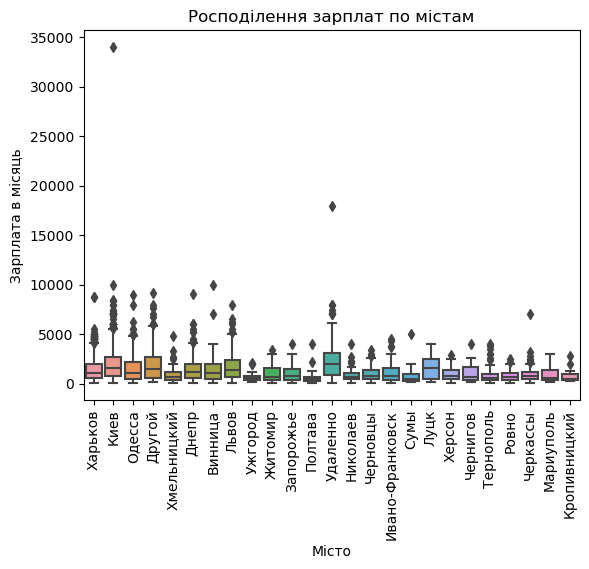

In [18]:
sns.boxplot(x='Город', y='Зарплата.в.месяц', data=df)
plt.xlabel('Місто')
plt.ylabel('Зарплата в місяць')
plt.title('Росподілення зарплат по містам')
plt.xticks(rotation=90)
plt.show()

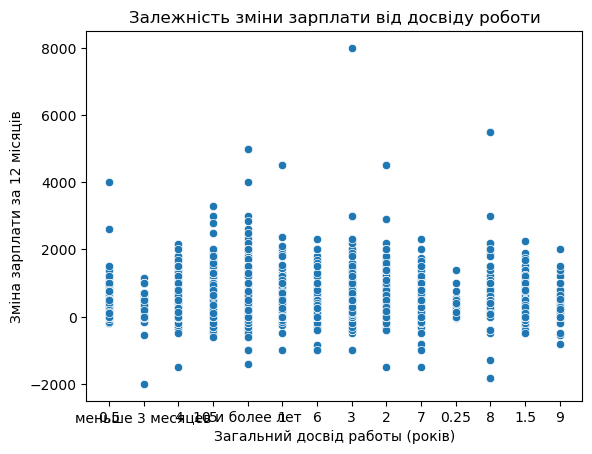

In [19]:
sns.scatterplot(x='Общий.опыт.работы', y='Изменение.зарплаты.за.12.месяцев', data=df)
plt.xlabel('Загальний досвід работы (років)')
plt.ylabel('Зміна зарплати за 12 місяців')
plt.title('Залежність зміни зарплати від досвіду роботи')
plt.show()

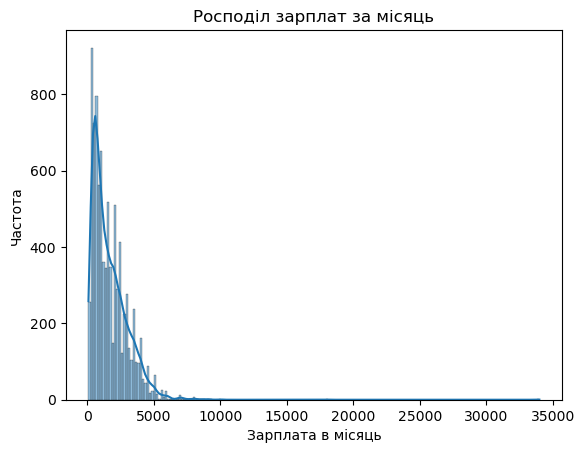

In [20]:
sns.histplot(data=df, x='Зарплата.в.месяц', kde=True)
plt.xlabel('Зарплата в місяць')
plt.ylabel('Частота')
plt.title('Росподіл зарплат за місяць')
plt.show()